# FINAL PROJECT 3

**Kelompok 4**

Anggota :


1. Nuur Ainii Kartika Putri - (PYTN-KS05-006)
2. Muhammad Rezky Hamesi Akhyar - (PYTN-KS05-007)
3. Roikhatul Miskiyah - (PYTN-KS05-010)

# 1. Introduction

## a. Project Overview

1. Latar belakang

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 13 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.


2. Data yang digunakan

Dataset yang digunakan adalah database besar yang berisi 299 baris dan 13 kolom, di sini kita akan menggunakan dataset "heart_failure_clinical_records_dataset.csv" yang tersedia untuk digunakan https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data. Data tersebut berisi kumpulan fitur yang digunakan untuk memprediksi kematian akibat gagal jantung. Variabel independen  yang digunakan adalah fitur age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, dan time. Sedangkan untuk variabel dependennya menggunakan fitur DEATH_EVENT. 

3. Objective yang ingin dicapai

Dalam penelitian ini kami memprediksi dari kumpulan data rekaman penyakit CVD untuk memprediksi kematian akibat penyakit gagal jantung. 

Data ini memiliki 13 atribut. 
Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# 2. Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np # linear algebra

import missingno as msn

# import libraries for plotting
from matplotlib import pylab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

# 3. Data Loading

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/heart_failure_clinical_records_dataset.csv')
pd.set_option('display.max_columns',None)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape

(299, 13)

Baris: 299

Kolom: 13

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada hasil di atas terlihat bahwa tipe data semua fitur kolom dataset adalah numeric yakni tipe int64 dan float64.

# 4. Data Cleaning

## a. Missing Value

Pada tahap ini dilakukan untuk melihat apakah terdapat missing value pada dataset.

In [ ]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dapat terlihat bahwa dataset yang digunakan tidak memiliki missing value, maka tidak perlu dilakukan filling pada kolom yang mengandung missing value.

## b. Duplikasi data

Pada tahap ini dilakukan untuk melihat apakah terdapat duplikasi data dalam dataset.

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [ ]:
df.duplicated().sum()

0

Dapat terlihat bahwa pada dataset yang digunakan tidak terdapat duplikasi data dalam dataset.

# 5. Explorasi Data

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## 1. Korelasi antar avariabel (Heatmap)

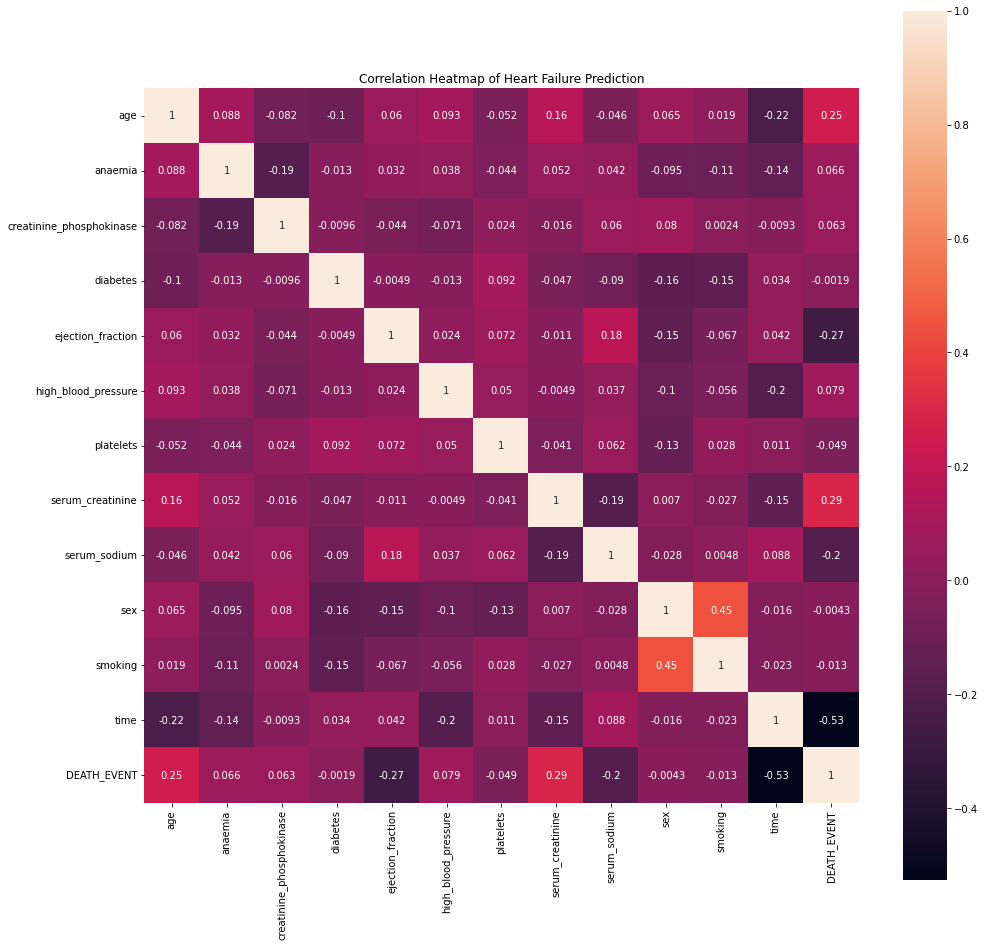

In [ ]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((16,16))
sns.heatmap(df.corr(), square = True, annot = True)

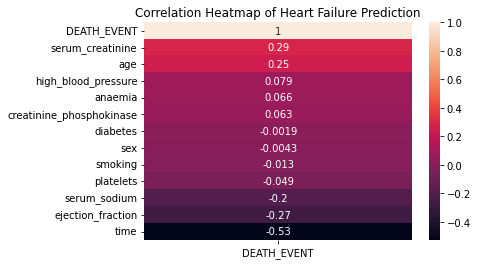

In [ ]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False), annot = True)
plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Dapat terlihat pada tabel di atas, bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukan angka yang cukup kecil. Variabel yang memiliki korelasi cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel time.

## 2. Numerical Fitur

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

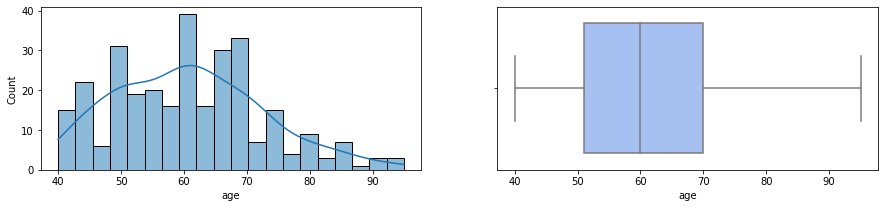

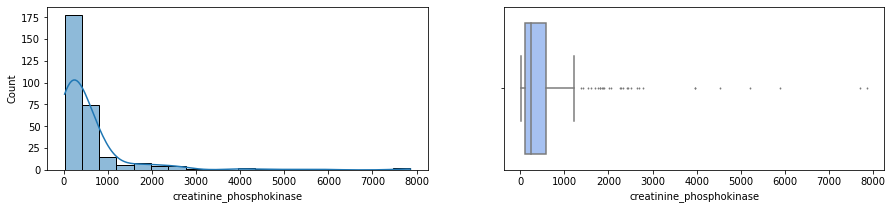

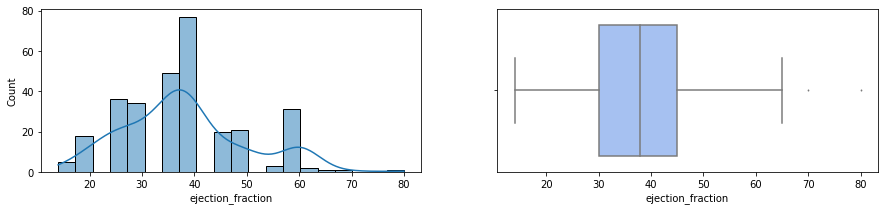

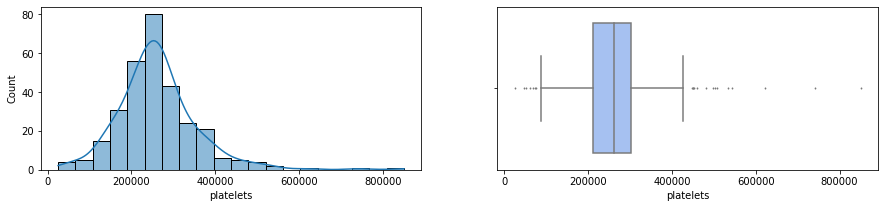

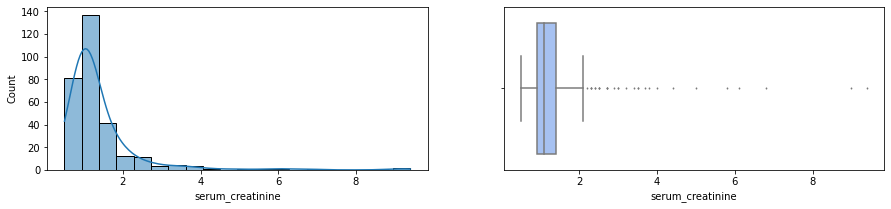

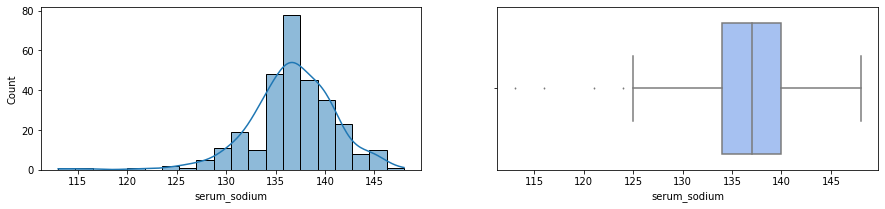

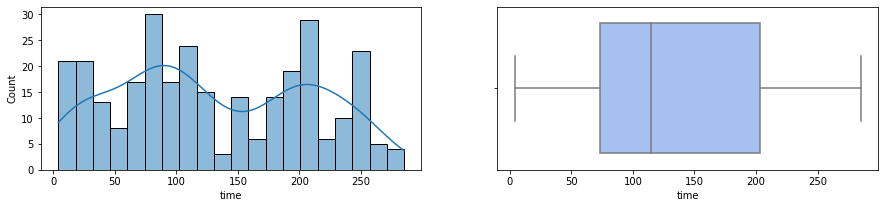

In [ ]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

Berdasarkan visualisasi di atas dapat diketahui bahwa hampir semua variabel memiliki outliers. Untuk itu kami akan melakukan penanganan pada fitur-fitur yang memiliki outliers.

## 3. Boolean Fitur

Boolean merupakan tipe data yang hanya memiliki dua nilai. Dalam kasus ini, beberapa fitur hanya memiliki dua nilai yaitu 0 dan 1, fitur-fitur trsebut diantaranya adalah anemia, diabetes, high_blood_preassure, sex, smooking, dan DEATH_EVENT

### a. Kolom anaemia

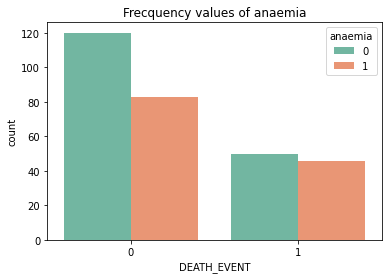

In [ ]:
sns.countplot(x ='DEATH_EVENT', hue = "anaemia", data = df, palette = "Set2")
plt.title('Frecquency values of anaemia')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan   yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia)

### b. Kolom diabetes

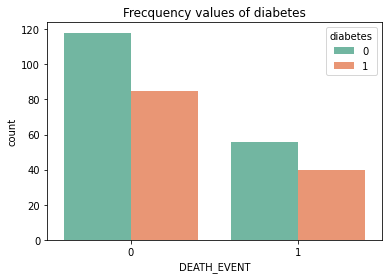

In [ ]:
sns.countplot(x ='DEATH_EVENT', hue = "diabetes", data = df, palette = "Set2")
plt.title('Frecquency values of diabetes')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengidap diabetes atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

### c. Kolom high_blood_pressure

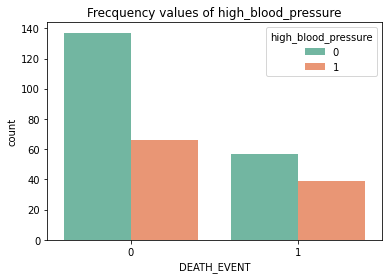

In [ ]:
sns.countplot(x ='DEATH_EVENT', hue = "high_blood_pressure", data = df, palette = "Set2")
plt.title('Frecquency values of high_blood_pressure')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

### d. Kolom sex

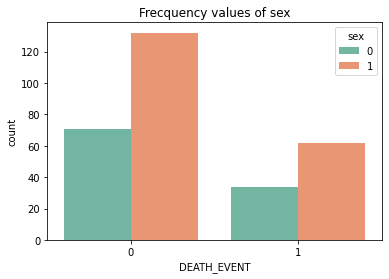

In [ ]:
sns.countplot(x ='DEATH_EVENT', hue = "sex", data = df, palette = "Set2")
plt.title('Frecquency values of sex')
plt.show()

Pada visualisasi di atas, frekuensi seseorang yang meninggal lebih banyak berjenis kelamin wanita dibandingkan pria, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin wanita.

e. Kolom smoking

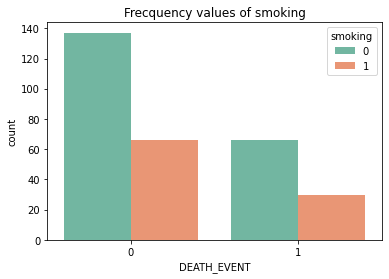

In [ ]:
sns.countplot(x ='DEATH_EVENT', hue = "smoking", data = df, palette = "Set2")
plt.title('Frecquency values of smoking')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang merokok atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok.

### f. Kolom DEATH_EVENT

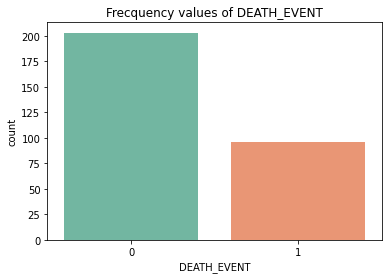

In [ ]:
sns.countplot(x = 'DEATH_EVENT', data = df, palette = 'Set2')
plt.title('Frecquency values of DEATH_EVENT')
plt.show()

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang.

# 6. Data Preprocessing

In [ ]:
data = df.copy()

### a. Handling Outlier

In [ ]:
features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

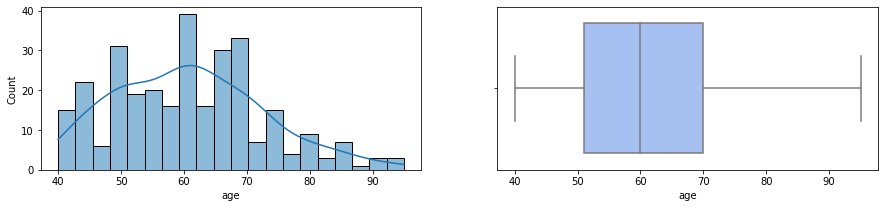

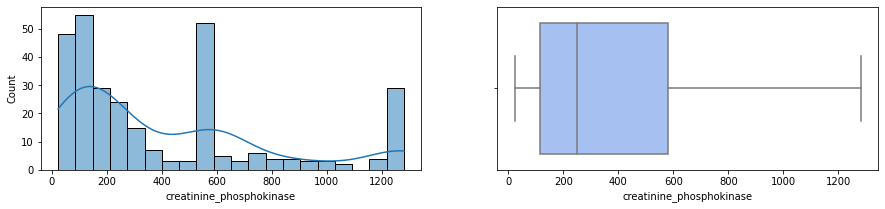

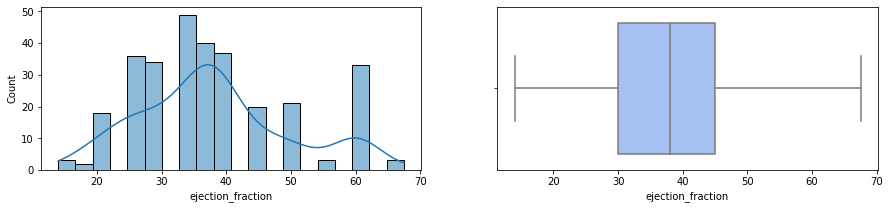

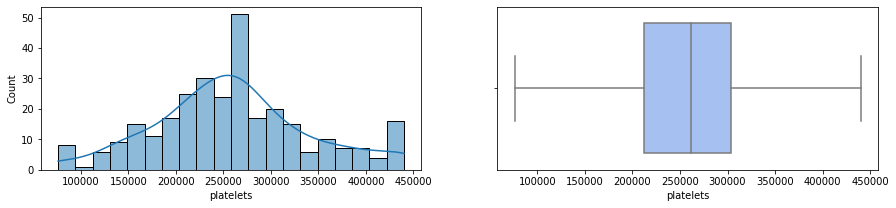

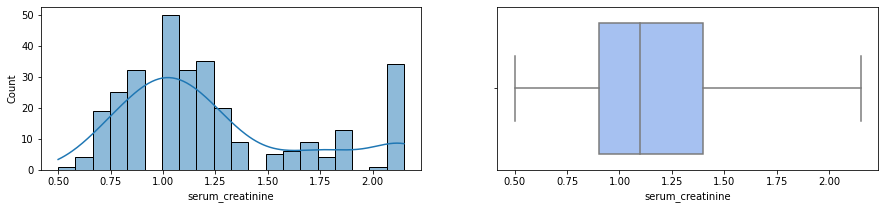

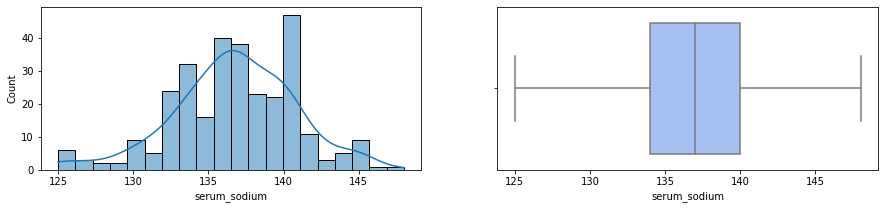

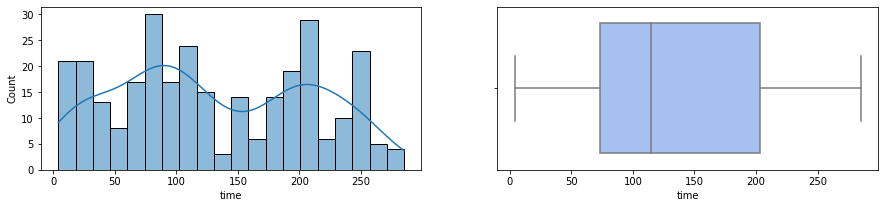

In [ ]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Pada visualisasi di atas bahwa sudah tidak ada outliers dan data memiliki persebaran yang baik.

## b. Splitting Dataset

In [ ]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = data.drop(['DEATH_EVENT'], axis = 1)
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## c. Handling Imbalanced

Teknik Penyeimbang dataset yang digunakan adalah :
- SMOTE
- Borderline SMOTE
- ADASYN

Parameter k_neighbors diatur menjadi 8 neighbors untuk setiap teknik

### SMOTE

In [ ]:
smote = SMOTE(k_neighbors=8)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter
print('Before SMOTE : ', Counter(y_train))
print('After SMOTE :', Counter(y_train_smote))

Before SMOTE :  Counter({0: 166, 1: 73})
After SMOTE : Counter({0: 166, 1: 166})


### Borderline SMOTE

In [ ]:
b_smote = BorderlineSMOTE(k_neighbors=8)

In [ ]:
X_train_bsmote, y_train_bsmote = b_smote.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter
print('Before BSMOTE : ', Counter(y_train))
print('After BSMOTE :', Counter(y_train_bsmote))

Before BSMOTE :  Counter({0: 166, 1: 73})
After BSMOTE : Counter({0: 166, 1: 166})


### ADASYN

In [ ]:
ada = ADASYN(n_neighbors=8)

In [ ]:
X_train_ada, y_train_ada = ada.fit_resample(X_train.astype('float'), y_train)

In [ ]:
from collections import Counter
print('Before ADASYN : ', Counter(y_train))
print('After ADASYN :', Counter(y_train_bsmote))

Before ADASYN :  Counter({0: 166, 1: 73})
After ADASYN : Counter({0: 166, 1: 166})


# 7. Modeling & Evaluation

Algoritma Yang digunakan adalah Random Forest, terdapat 4 model yang akan dilatih dengan teknik penyeimbang datasetnya masing-masing. 

Berikut Modelnya : 
- model_unbalanced : Model yang menggunakan data yang belum seimbang
- model_smote : Model yang menggunakan teknik smote sebagai penyeimbang jumlah data kelas dataset
- mode_bsmote : Model yang menggunakan teknik borderline smote sebagai penyeimbang jumlah data kelas dataset
- mode_ada : Model yang menggunakan teknik adasyn sebagai penyeimbang jumlah data kelas dataset

## a. Modeling Random Forest

In [ ]:
model_unbalanced = RandomForestClassifier(max_depth=150, random_state=42)
model_smote = RandomForestClassifier(max_depth=150, random_state=42)
model_bsmote = RandomForestClassifier(max_depth=150, random_state=42)
model_ada = RandomForestClassifier(max_depth=150, random_state=42)

In [ ]:
model_unbalanced.fit(X_train, y_train)
model_smote.fit(X_train_smote, y_train_smote)
model_bsmote.fit(X_train_bsmote, y_train_bsmote)
model_ada.fit(X_train_ada, y_train_ada)

RandomForestClassifier(max_depth=150, random_state=42)

In [ ]:
y_unbalanced_pred = model_unbalanced.predict(X_test)
y_smote_pred = model_smote.predict(X_test)
y_bsmote_pred = model_bsmote.predict(X_test)
y_ada_pred = model_ada.predict(X_test)

## b. Evaluation

Pada Bagian Evaluation tiap classification report dan confusion matrix dari tiap model akan ditampilkan

### Unbalanced Data

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_unbalanced_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_unbalanced_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60

Accuracy of the Model: 85.0 %


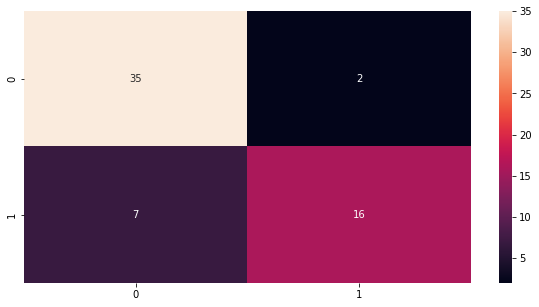

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_unbalanced_pred)
sns.heatmap(cm1, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 35 + 16 = 51 diprediksi benar (sesuai) dan 2 + 7 = 9 diprediksi tidak benar (tidak sesuai).

Pada model unbalnaced data, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 16
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 35
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 7(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 2(Kesalahan tipe II)

### SMOTE

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_smote_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_smote_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.85      0.74      0.79        23

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60

Accuracy of the Model: 85.0 %


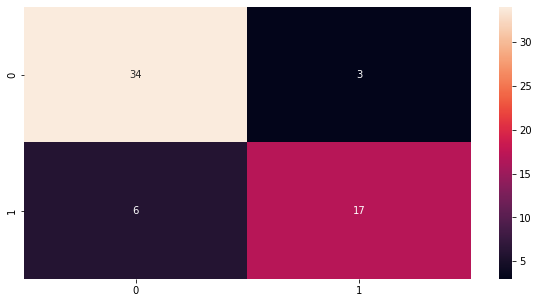

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm2 = confusion_matrix(y_test, y_smote_pred)
sns.heatmap(cm2, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 35 + 18 = 53 diprediksi benar (sesuai) dan 2 + 5 = 7 diprediksi tidak benar (tidak sesuai).

Pada model SMOTE, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 18
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 35
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 5(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 2(Kesalahan tipe II)

### Borderline SMOTE

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_bsmote_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_bsmote_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60

Accuracy of the Model: 85.0 %


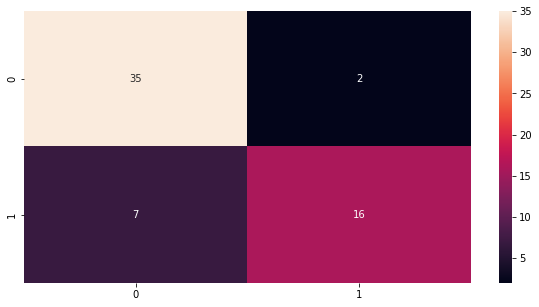

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm3 = confusion_matrix(y_test, y_bsmote_pred)
sns.heatmap(cm3, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 36 + 17 = 53 diprediksi benar (sesuai) dan 1 + 6 = 7 diprediksi tidak benar (tidak sesuai).

Pada model Borderline SMOTE, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 17
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 36
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 6(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 1(Kesalahan tipe II)

### ADASYN

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_ada_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_ada_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        37
           1       0.89      0.70      0.78        23

    accuracy                           0.85        60
   macro avg       0.86      0.82      0.83        60
weighted avg       0.85      0.85      0.85        60

Accuracy of the Model: 85.0 %


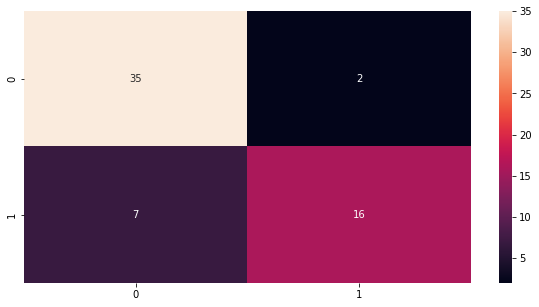

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm4 = confusion_matrix(y_test, y_ada_pred)
sns.heatmap(cm4, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 34 + 17 = 51 diprediksi benar (sesuai) dan 3 + 6 = 9 diprediksi tidak benar (tidak sesuai).

Pada model ADASYN, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 17
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 34
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 6(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 3(Kesalahan tipe II)

## c. Comparison

Pada bagian ini akan ditampilkan perbandingan nilai evaluasi (Akurasi, Recall, Precision) pada setiap model

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

hasil1 = [(accuracy_score(y_test, y_unbalanced_pred) * 100), (recall_score(y_test, y_unbalanced_pred,  pos_label=1) * 100), (precision_score(y_test, y_unbalanced_pred,  pos_label=1) * 100)]
hasil2 = [(accuracy_score(y_test, y_smote_pred) * 100), (recall_score(y_test, y_smote_pred,  pos_label=1) * 100), (precision_score(y_test, y_smote_pred,  pos_label=1) * 100)]
hasil3 = [(accuracy_score(y_test, y_bsmote_pred) * 100), (recall_score(y_test, y_bsmote_pred,  pos_label=1) * 100), (precision_score(y_test, y_bsmote_pred,  pos_label=1) * 100)]
hasil4 = [(accuracy_score(y_test, y_ada_pred) * 100), (recall_score(y_test, y_ada_pred,  pos_label=1) * 100), (precision_score(y_test, y_ada_pred,  pos_label=1) * 100)]

dic = {'Unbalanced' : [str(round((hasil1[0]))) + '%', str(round((hasil1[1]))) + '%', str(round((hasil1[2]))) + '%'], 
       'SMOTE' : [str(round((hasil2[0]))) + '%', str(round((hasil2[1]))) + '%', str(round((hasil2[2]))) + '%'],
       'Borderline_SMOTE' : [str(round((hasil3[0]))) + '%', str(round((hasil3[1]))) + '%', str(round((hasil3[2]))) + '%'],
       'ADASYN' : [str(round((hasil4[0]))) + '%', str(round((hasil4[1]))) + '%', str(round((hasil4[2]))) + '%']}

df_hasil = pd.DataFrame(data = dic, index=['Accuracy', 'Recall', 'Precision'])
df_hasil

,Unbalanced,SMOTE,Borderline_SMOTE,ADASYN
Accuracy,85%,85%,85%,85%
Recall,70%,74%,70%,70%
Precision,89%,85%,89%,89%


# Kesimpulan

Setiap Nilai evaluasi pada bagian perbandingan model memiliki nilai yang hampir sama.

- Untuk nilai akurasi berada di rentang nilai 80 - 88
- Untuk nilai recall berada di rentang nilai 70 - 75
- Untuk nilai Precision berada di rentang nilai 89 - 94

Nilai evaluasi terutama untuk nilai akurasi tidak bisa mencapai nilai 95 persen yang merupakan nilai optimal untuk model klasifikasi, hal ini dikarenakan beberapa faktor : 

1. Kolerasi setiap kolom terhadap variabel dependen(Death Event) terlalu kecil, kolom atau variabel independen dengan nilai korelasi tertinggi dengan variabel dependen hanya berada direntang nilai 0.2
2. Jumlah Dataset yang terlalu sedikit, yaitu hanya berjumlah 300 data, dan data tersebut nantinya akan dibagi ke dalam data training data testing

                                                                          --- Selesai ---